In [1]:
import pickle
import os
from pathlib import Path

In [2]:
cd ../test_data

/Users/sashi/repos/ThinkChipBackend/test_data


In [3]:
ls

SingleBlinksData/
[f]aditya_eyes_closed|151019_144531.pickle
[f]aditya_work|151019_150218.pickle
[f]facebook|141019_160022.pickle
[f]hcl_1|111019_142206.pickle
[f]social_media|111019_153856.pickle
call_of_duty.pickle
facebook.pickle
raghav_eyes_closed/
raghav_work/
sashi_eyes_closed/
sashi_work/


In [4]:
eyes_closed = os.listdir('sashi_eyes_closed/')
work = os.listdir('sashi_work/')
print(list(enumerate(eyes_closed)))
print(list(enumerate(work)))

[(0, '[f]sashi_eyes_closed|151019_135421.pickle'), (1, '[f]sashi_EYES_CLOSED|171019_172659.pickle')]
[(0, '[f]sashi_assignment|151019_140830.pickle'), (1, '[f]sashi_ATTENTION|171019_173817.pickle')]


In [5]:
# Setting data directory paths
eyes_closed_data = []
work_data = []
eyes_closed_folder = Path('sashi_eyes_closed/')
work_folder = Path('sashi_work/')

# Loading Eyes closed data from all files and appending to eyes_closed_data
for filename in eyes_closed:
    if 'pickle' in filename:
        with open(eyes_closed_folder/filename, 'rb') as f:
            eyes_closed_data.append(pickle.load(f))

# Loading work data from all files and appending to work data
for filename in work:
    if 'pickle' in filename:
        with open(work_folder/filename, 'rb') as f:
            work_data.append(pickle.load(f))
            
print(f"Lenght of eyes_closed: {len(eyes_closed)}")
print(f"Lenght of work: {len(work)}")

Lenght of eyes_closed: 2
Lenght of work: 2


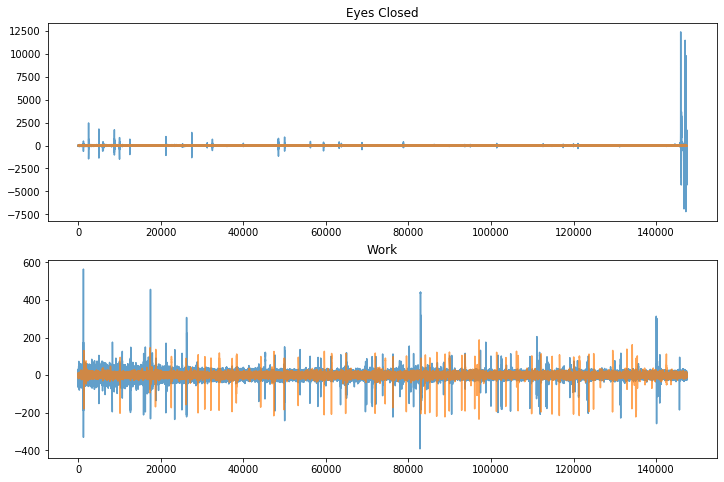

In [6]:
# Plot the filtered (DC and 50Hz notch) data without removing bad epochs
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots(2,1, figsize=(12,8))

for dt in eyes_closed_data:
    ax[0].plot(dt[10:,0,:].reshape(-1), alpha=0.7)
    ax[0].set_title('Eyes Closed')

for dt in work_data:
    ax[1].plot(dt[10:,0,:].reshape(-1), alpha=0.7)
    ax[1].set_title('Work')

In [7]:
import sys
sys.path.append('../')

In [8]:
from features import feature_removal as fr

Using config.dataReader - random number


In [9]:
# Removing bad epochs containing eye blinks
import config
config.reset_filter_states() # Why do we need to reset filter states?

eyes_closed_data_clean = []
work_data_clean = []

print("Removing bad epochs from eyes closed data")
for i, dt in enumerate(eyes_closed_data):
    config.reset_filter_states()
    eyes_closed_data_clean.append(fr.remove_bad_epochs(dt,fr.energy_of_epoch,threshold=100))
    
print("Removing bad epochs from work data")
for i, dt in enumerate(work_data):
    config.reset_filter_states()
    work_data_clean.append(fr.remove_bad_epochs(dt,fr.energy_of_epoch,threshold=100))


Removing bad epochs from eyes closed data
CONSOLE: ENEGERGY: 486542.00798278174
CONSOLE: ENEGERGY: 77814.53933080405
CONSOLE: ENEGERGY: 8236.526412577003
CONSOLE: ENEGERGY: 418.7481262841327
CONSOLE: ENEGERGY: 187.6976517123181
CONSOLE: ENEGERGY: 515.7414261543726
CONSOLE: ENEGERGY: 772.6427271328087
CONSOLE: ENEGERGY: 85.33453167981733
CONSOLE: ENEGERGY: 274.04472804203135
CONSOLE: ENEGERGY: 57.3292198773736
CONSOLE: ENEGERGY: 53.706264125660894
CONSOLE: ENEGERGY: 43.80967710863083
CONSOLE: ENEGERGY: 381.7210945107038
CONSOLE: ENEGERGY: 289.96076876428447
CONSOLE: ENEGERGY: 47.70718355994291
CONSOLE: ENEGERGY: 51.27966663823108
CONSOLE: ENEGERGY: 52.79161064440788
CONSOLE: ENEGERGY: 65.26818001028064
CONSOLE: ENEGERGY: 92.62011679775986
CONSOLE: ENEGERGY: 76.97690420291117
CONSOLE: ENEGERGY: 68.07926979348203
CONSOLE: ENEGERGY: 131.55998847796724
CONSOLE: ENEGERGY: 65.33009051581713
CONSOLE: ENEGERGY: 15.668494482498525
CONSOLE: ENEGERGY: 39.86430824710926
CONSOLE: ENEGERGY: 85.843213

CONSOLE: ENEGERGY: 46.51044546382947
CONSOLE: ENEGERGY: 60.886528571819035
CONSOLE: ENEGERGY: 44.627289541819835
CONSOLE: ENEGERGY: 81.86880352549872
CONSOLE: ENEGERGY: 74.67732824435024
CONSOLE: ENEGERGY: 34.06986099889404
CONSOLE: ENEGERGY: 60.35528719067683
CONSOLE: ENEGERGY: 23.13954750474711
CONSOLE: ENEGERGY: 51.500304382083016
CONSOLE: ENEGERGY: 28.66167826708557
CONSOLE: ENEGERGY: 30.63433565935289
CONSOLE: ENEGERGY: 52.579300473333134
CONSOLE: ENEGERGY: 27.973495406948068
CONSOLE: ENEGERGY: 13.792308446599698
CONSOLE: ENEGERGY: 17.55411354890083
CONSOLE: ENEGERGY: 21.15291933088846
CONSOLE: ENEGERGY: 21.354754686618218
CONSOLE: ENEGERGY: 15.74788949534328
CONSOLE: ENEGERGY: 40.69894931073286
CONSOLE: ENEGERGY: 25.503857495186306
CONSOLE: ENEGERGY: 15.836618586835346
CONSOLE: ENEGERGY: 50.72177416424587
CONSOLE: ENEGERGY: 64.85103105762441
CONSOLE: ENEGERGY: 23.190003147671263
CONSOLE: ENEGERGY: 19.40902318988093
CONSOLE: ENEGERGY: 21.286321448359782
CONSOLE: ENEGERGY: 11.56377

CONSOLE: ENEGERGY: 18290.851081151726
CONSOLE: ENEGERGY: 3180.755389107901
CONSOLE: ENEGERGY: 362.5913828600872
CONSOLE: ENEGERGY: 56.47016845093484
CONSOLE: ENEGERGY: 77.1492076209161
CONSOLE: ENEGERGY: 37.627844072774415
CONSOLE: ENEGERGY: 32.76677897525129
CONSOLE: ENEGERGY: 61.28683270279478
CONSOLE: ENEGERGY: 28.17188249576433
CONSOLE: ENEGERGY: 13.73070650652414
CONSOLE: ENEGERGY: 36.61942167536095
CONSOLE: ENEGERGY: 68.59936516717457
CONSOLE: ENEGERGY: 45.54080239567056
CONSOLE: ENEGERGY: 73.8661413035874
CONSOLE: ENEGERGY: 20.17334575560865
CONSOLE: ENEGERGY: 30.74551659452476
CONSOLE: ENEGERGY: 38.794841136026974
CONSOLE: ENEGERGY: 52.63749274740196
CONSOLE: ENEGERGY: 74.83950435594423
CONSOLE: ENEGERGY: 73.19405038602711
CONSOLE: ENEGERGY: 49.43553909717107
CONSOLE: ENEGERGY: 21.60814431338611
CONSOLE: ENEGERGY: 71.65919300365519
CONSOLE: ENEGERGY: 51.35229026473613
CONSOLE: ENEGERGY: 55.3052462753431
CONSOLE: ENEGERGY: 15.960288228321733
CONSOLE: ENEGERGY: 43.5002683222722
C

CONSOLE: ENEGERGY: 242814.1634289853
CONSOLE: ENEGERGY: 40290.10542153404
CONSOLE: ENEGERGY: 4974.711379585052
CONSOLE: ENEGERGY: 186.57025059813236
CONSOLE: ENEGERGY: 32.475027086917144
CONSOLE: ENEGERGY: 58.724025844903196
CONSOLE: ENEGERGY: 37.54299039305003
CONSOLE: ENEGERGY: 29.380351731710775
CONSOLE: ENEGERGY: 49.71063207554442
CONSOLE: ENEGERGY: 25.149488422592228
CONSOLE: ENEGERGY: 42.50106017769172
CONSOLE: ENEGERGY: 64.88803102325905
CONSOLE: ENEGERGY: 88.20851692782973
CONSOLE: ENEGERGY: 48.94890017008146
CONSOLE: ENEGERGY: 61.50071322563116
CONSOLE: ENEGERGY: 61.29937286798452
CONSOLE: ENEGERGY: 44.40283115095513
CONSOLE: ENEGERGY: 47.85386741903526
CONSOLE: ENEGERGY: 32.41995506514428
CONSOLE: ENEGERGY: 46.253928375107485
CONSOLE: ENEGERGY: 140.53360951026494
CONSOLE: ENEGERGY: 73.10979050328923
CONSOLE: ENEGERGY: 53.23575007909791
CONSOLE: ENEGERGY: 22.2578281383054
CONSOLE: ENEGERGY: 22.67197886774109
CONSOLE: ENEGERGY: 33.45417001816709
CONSOLE: ENEGERGY: 27.2053086324

CONSOLE: ENEGERGY: 14.497026460971949
CONSOLE: ENEGERGY: 11.109437768024224
CONSOLE: ENEGERGY: 17.97467120153843
CONSOLE: ENEGERGY: 5.23413041542262
CONSOLE: ENEGERGY: 7.1039749102091205
CONSOLE: ENEGERGY: 14.510572499373398
CONSOLE: ENEGERGY: 10.254807341610048
CONSOLE: ENEGERGY: 9.529013640031296
CONSOLE: ENEGERGY: 31.478950079370723
CONSOLE: ENEGERGY: 7.6773456988516156
CONSOLE: ENEGERGY: 12.125799691223607
CONSOLE: ENEGERGY: 25.039629922323808
CONSOLE: ENEGERGY: 26.164067296294473
CONSOLE: ENEGERGY: 26.823083083195062
CONSOLE: ENEGERGY: 33.51309642156968
CONSOLE: ENEGERGY: 5.611248972601863
CONSOLE: ENEGERGY: 5.9592476662196265
CONSOLE: ENEGERGY: 8.952891357964734
CONSOLE: ENEGERGY: 9.281156358433583
CONSOLE: ENEGERGY: 16.97715214169237
CONSOLE: ENEGERGY: 6.414267311315359
CONSOLE: ENEGERGY: 10.28766676331744
CONSOLE: ENEGERGY: 15.422507186512098
CONSOLE: ENEGERGY: 7.4044970429535555
CONSOLE: ENEGERGY: 24.92587417910945
CONSOLE: ENEGERGY: 68.08227863049979
CONSOLE: ENEGERGY: 34.506

In [10]:
print("Shapes for clean eyes closed data:")
for d in eyes_closed_data_clean:
    print(d.shape)
    
print("Shapes for clean work data:")
for d in work_data_clean:
    print(d.shape)


Shapes for clean eyes closed data:
(1101, 1, 250)
(1190, 1, 250)
Shapes for clean work data:
(1056, 1, 250)
(1065, 1, 250)


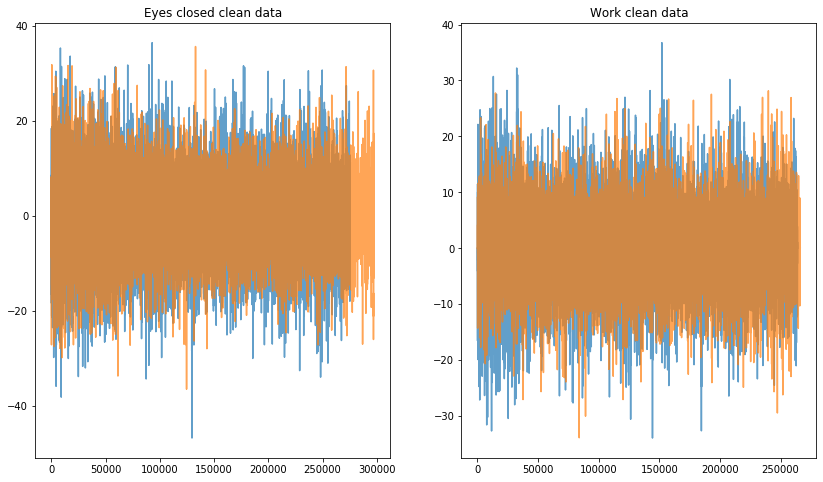

In [11]:
#Plotting data after removing bad epochs
fig, ax = plt.subplots(1,2,figsize=(14,8))

for d in eyes_closed_data_clean:
    ax[0].plot(d.squeeze().reshape(-1),alpha=0.7)
    ax[0].set_title("Eyes closed clean data")
for d in work_data_clean:
    ax[1].plot(d.squeeze().reshape(-1),alpha=0.7)
    ax[1].set_title("Work clean data")

In [12]:
from features import *

In [13]:
# Get band energy for all files and put in a list
eyes_closed_bandpower = []
work_bandpower = []

# Get band energy for eyes close
for o in eyes_closed_data_clean:
    bandp = []
    for d in o:
        bandp.append(get_bandpower(d.reshape(1,d.shape[0],d.shape[1])))
    eyes_closed_bandpower.append(np.array(bandp))

# Get band energy for work
for o in work_data_clean:
    bandp = []
    for d in o:
        bandp.append(get_bandpower(d.reshape(1,d.shape[0],d.shape[1])))
    work_bandpower.append(np.array(bandp))

print(f"length of eyes closed band energy list: {len(eyes_closed_bandpower)}")
print(f"length of work band energy list: {len(work_bandpower)}")

/usr/local/lib/python3.7/site-packages/scipy/signal/spectral.py:1773: UserWarning: nperseg = 500 is greater than input length  = 250, using nperseg = 250
  .format(nperseg, input_length))


length of eyes closed band energy list: 2
length of work band energy list: 2


In [14]:
print("Shapes for band energy eyes closed data:")
for d in eyes_closed_bandpower:
    print(d.shape)
    
print("Shapes of band energy work data:")
for d in work_bandpower:
    print(d.shape)


Shapes for band energy eyes closed data:
(1101, 1, 5)
(1190, 1, 5)
Shapes of band energy work data:
(1056, 1, 5)
(1065, 1, 5)


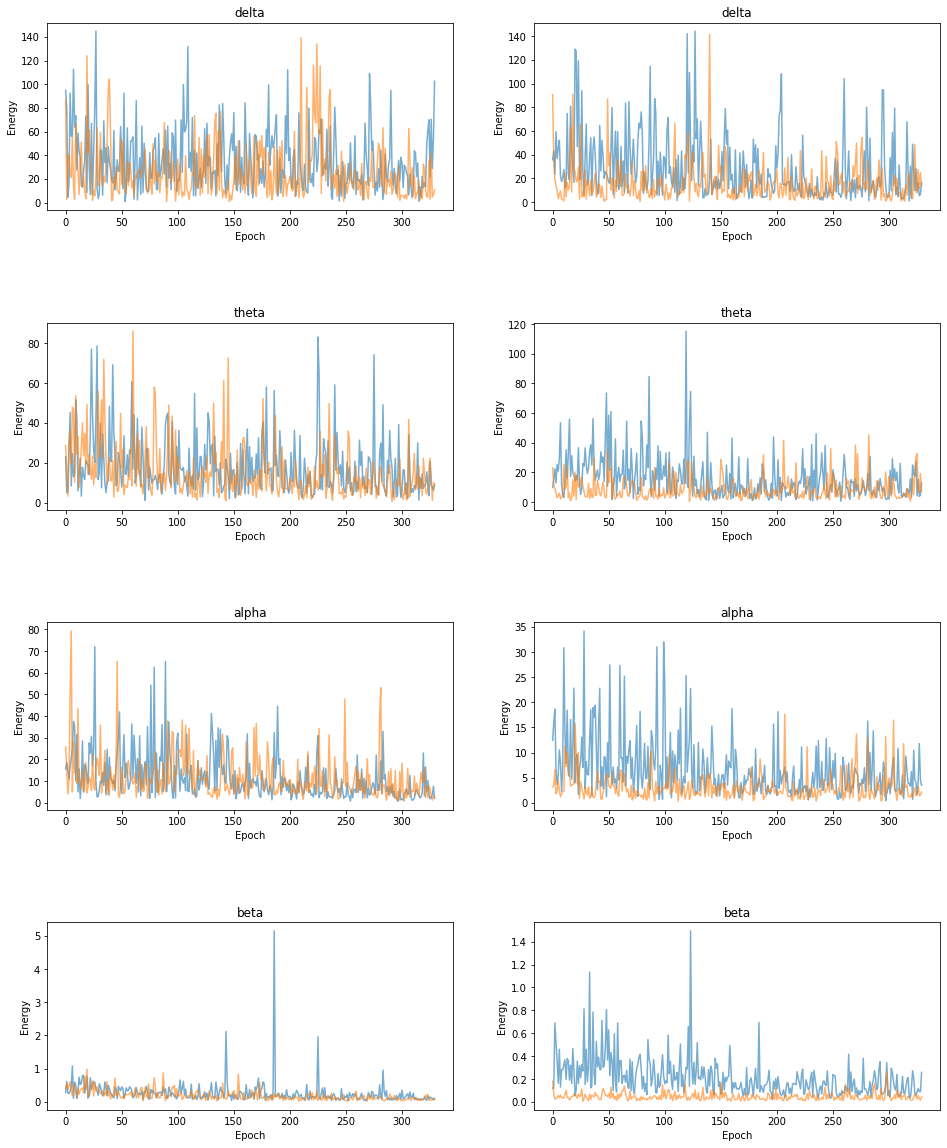

In [15]:
# Plot the band energy for each band. The x-axis is the index of epoch as we advance in time
bands = ['delta','theta','alpha','beta']
fig,ax = plt.subplots(len(bands),2,figsize=(16,20))
fig.subplots_adjust(hspace=0.6)

for b in eyes_closed_bandpower:
    for i, a in enumerate(ax[:,0]):
        c = 'r'
        a.plot(b[10:340,:,i].reshape(-1), alpha=0.6)
        a.set_title(bands[i])
        a.set_xlabel('Epoch')
        a.set_ylabel('Energy')

for b in work_bandpower:
    for i, a in enumerate(ax[:,1]):
        c = 'g'
        a.plot(b[10:340,:,i].reshape(-1), alpha=0.6)
        a.set_title(bands[i])
        a.set_xlabel('Epoch')
        a.set_ylabel('Energy')

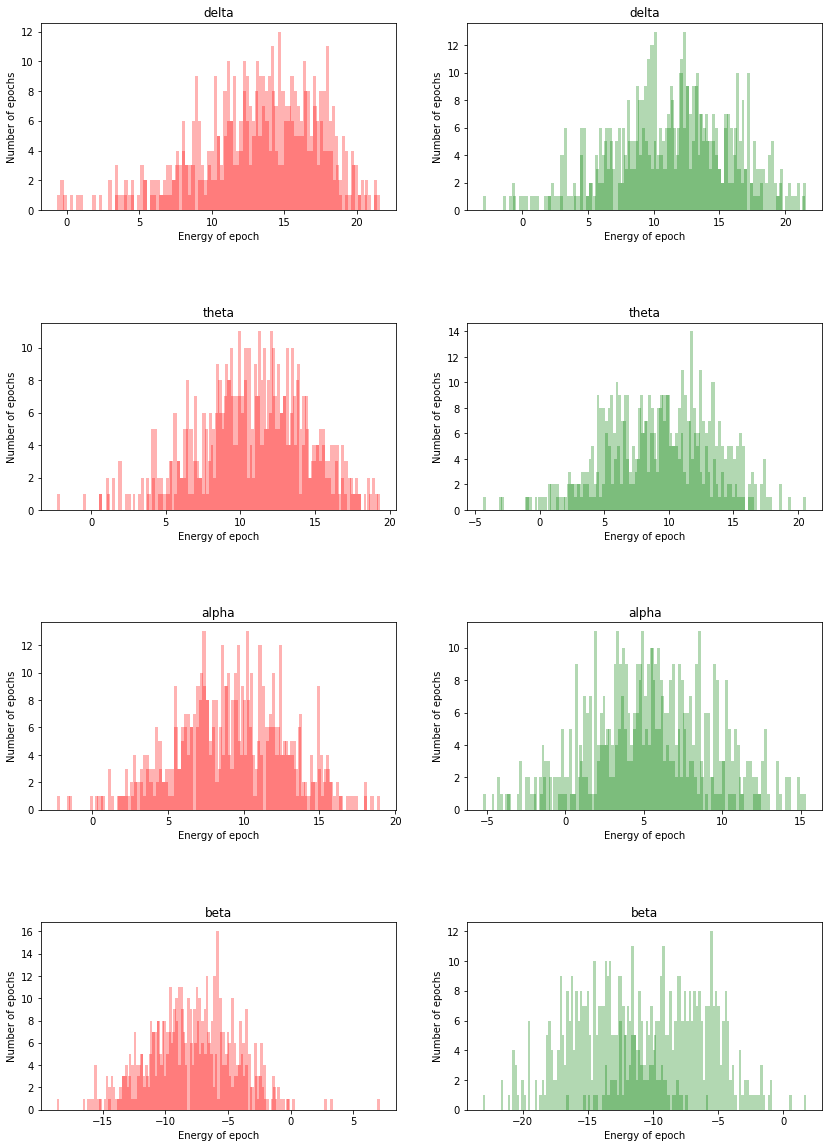

In [16]:
# Plot the histogram of band energy to visualize the distribution of energy of each band
fig,ax = plt.subplots(len(bands),2,figsize=(14,20))
fig.subplots_adjust(hspace=0.6)

import numpy as np
for b in eyes_closed_bandpower:
    c = 'r'
    for i, a in enumerate(ax[:,0]):
        a.hist(10*np.log10(b[10:340,:,i].reshape(-1)), color=c,bins=100,
                       density=False, alpha=0.3)
        a.set_title(bands[i])
        a.set_xlabel('Energy of epoch')
        a.set_ylabel('Number of epochs')
        
for b in work_bandpower:
    c = 'g'
    for i, a in enumerate(ax[:,1]):
        a.hist(10*np.log10(b[10:340,:,i].reshape(-1)), color=c,bins=100,
                       density=False, alpha=0.3)
        a.set_title(bands[i])
        a.set_xlabel('Energy of epoch')
        a.set_ylabel('Number of epochs')

# Modeling
Let's model the bandpower of each epoch as a random variable with a certain probability distribution (pdf). We will model the pdf using a GMM. The GMM can be trained using the Expectation maximization method, available readily through scikit-learn.

In [17]:
from sklearn.mixture import GaussianMixture
import numpy as np

# Convert each band into a one dimensional array
eyes_closed_theta = []
work_theta = []
band_ = 1
for b in eyes_closed_bandpower:
    eyes_closed_theta.append(b[:,0,band_])
    
for b in work_bandpower:
    work_theta.append(b[:,0,band_])


# Fit the GMM
eyes_closed_gmm_classifier = []
work_gmm_classifier = []
for b in eyes_closed_theta:
    eyes_closed_gmm_classifier.append(GaussianMixture(n_components=2).fit(20*np.log10(b.reshape(-1,1))))
    
for b in work_theta:
    work_gmm_classifier.append(GaussianMixture(n_components=2).fit(20*np.log10(b.reshape(-1,1))))

In [18]:
eyes_closed_bandpower[1].shape

(1190, 1, 5)

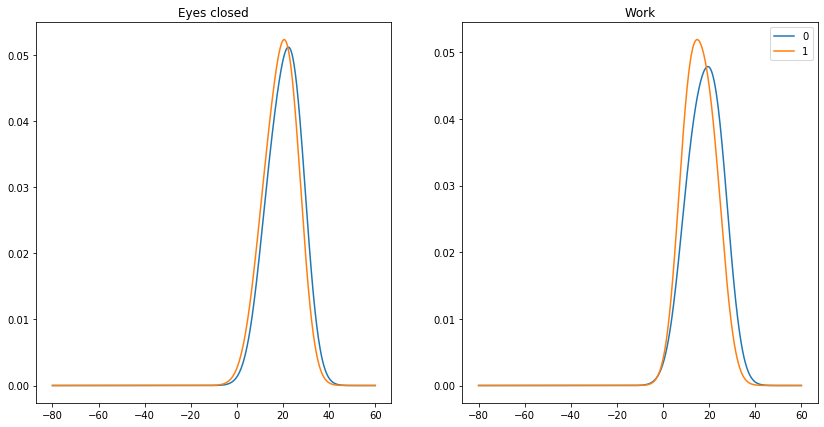

In [19]:
# Let's plot these GMMs
eyes_closed_y = []
work_y = []
x = np.linspace(-80, 60, 1000)
for g in eyes_closed_gmm_classifier:
    eyes_closed_y.append(np.exp(g.score_samples(x.reshape(-1,1))))
    
for g in work_gmm_classifier:
    work_y.append(np.exp(g.score_samples(x.reshape(-1,1))))

fig, ax = plt.subplots(1,2,figsize=(14,7))
for idx, _y in enumerate(eyes_closed_y):
    ax[0].plot(x,_y, label=str(idx))
    ax[0].set_title("Eyes closed")

for idx, _y in enumerate(work_y):
    ax[1].plot(x,_y, label=str(idx))
    ax[1].set_title("Work")

plt.legend()


In [20]:
eyes_closed_all = np.vstack(eyes_closed_bandpower)
work_all = np.vstack(work_bandpower)

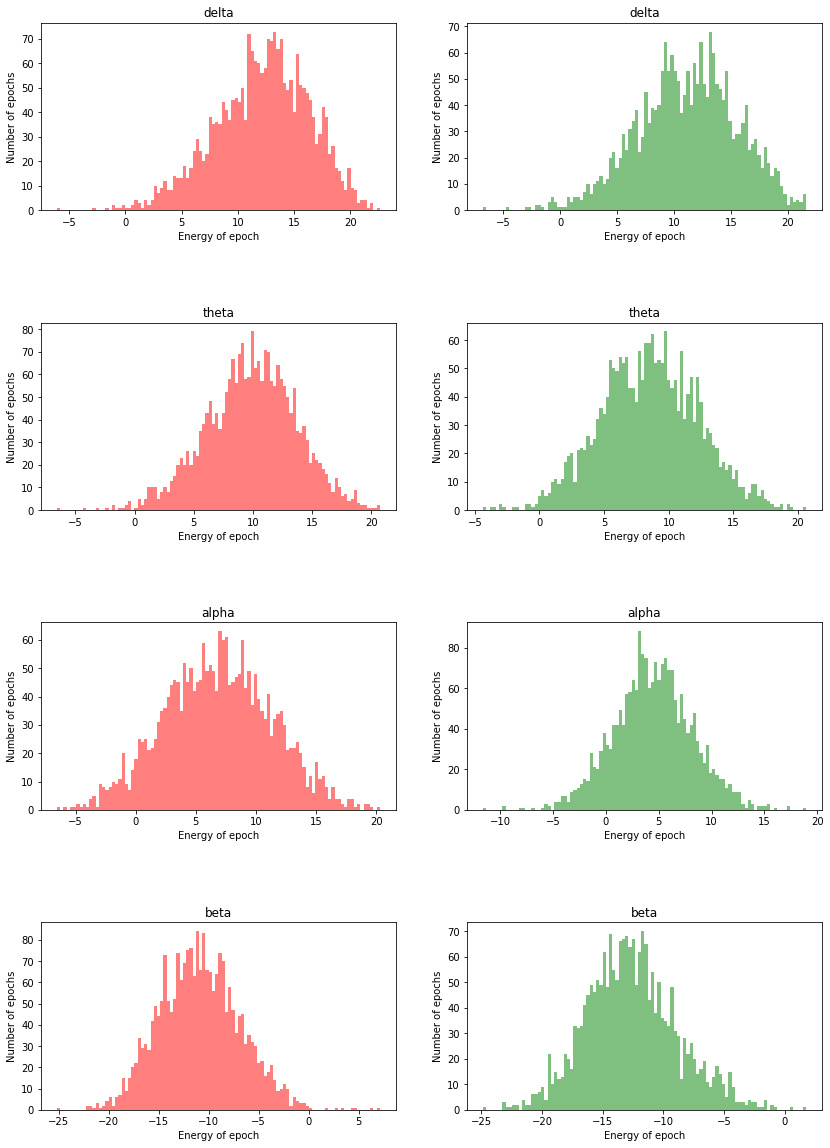

In [21]:
import numpy as np
c = 'r'
fig,ax = plt.subplots(len(bands),2,figsize=(14,20))
fig.subplots_adjust(hspace=0.6)

for i, a in enumerate(ax[:,0]):
    a.hist(10*np.log10(eyes_closed_all[10:,:,i].reshape(-1)), color=c,bins=100,
                   density=False, alpha=0.5)
    a.set_title(bands[i])
    a.set_xlabel('Energy of epoch')
    a.set_ylabel('Number of epochs')

c = 'g'
for i, a in enumerate(ax[:,1]):
    a.hist(10*np.log10(work_all[10:,:,i].reshape(-1)), color=c,bins=100,
                   density=False, alpha=0.5)
    a.set_title(bands[i])
    a.set_xlabel('Energy of epoch')
    a.set_ylabel('Number of epochs')

Shape of eyes_closed_theta_all: (2291,)
Shape of work_theta_all: (2121,)
Shape of eyes_closed_theta_all: (2291,)
Shape of work_theta_all: (2121,)
Shape of eyes_closed_theta_all: (2291,)
Shape of work_theta_all: (2121,)
Shape of eyes_closed_theta_all: (2291,)
Shape of work_theta_all: (2121,)


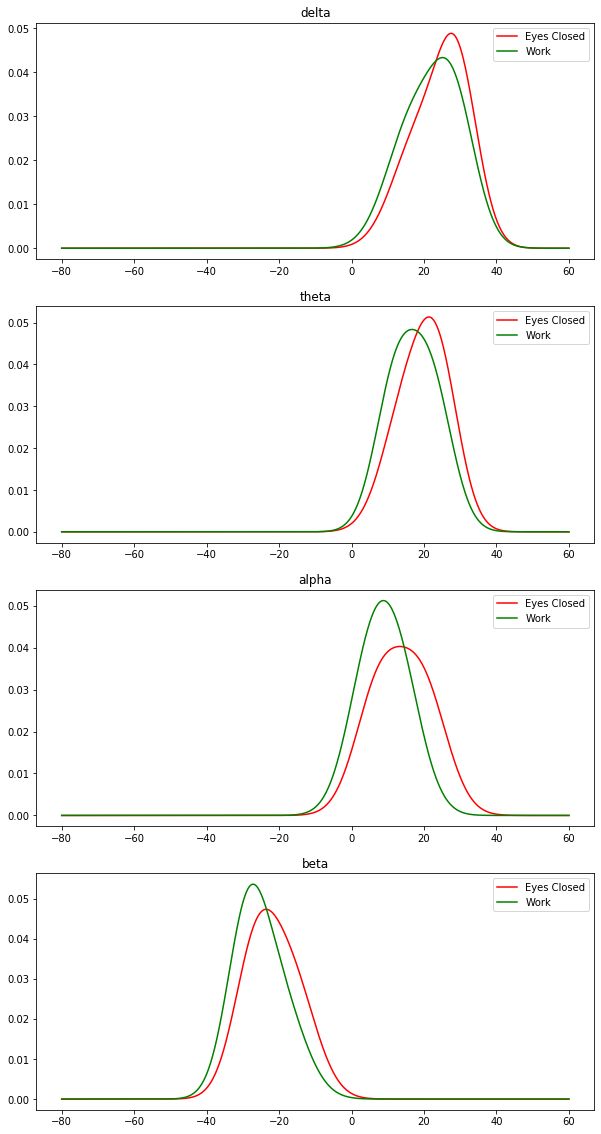

In [22]:
from sklearn.mixture import GaussianMixture
import numpy as np
fig,ax = plt.subplots(4,1,figsize=(10,20))

# Convert each band into a one dimensional array
for band_idx in range(4):
    eyes_closed_theta_all = []
    work_theta_all = []
    band_ = band_idx
    eyes_closed_theta_all = eyes_closed_all[:,0,band_]
    work_theta_all = work_all[:,0,band_]

    print(f"Shape of eyes_closed_theta_all: {eyes_closed_theta_all.shape}")
    print(f"Shape of work_theta_all: {work_theta_all.shape}")

    eyes_closed_gmm_classifier = GaussianMixture(n_components=2).fit(20*np.log10(eyes_closed_theta_all.reshape(-1,1)))
    work_gmm_classifier = GaussianMixture(n_components=2).fit(20*np.log10(work_theta_all.reshape(-1,1)))

    # Let's plot these GMMs
    x = np.linspace(-80, 60, 1000)
    eyes_closed_y = np.exp(eyes_closed_gmm_classifier.score_samples(x.reshape(-1,1)))
    work_y = np.exp(work_gmm_classifier.score_samples(x.reshape(-1,1)))

    ax[band_idx].plot(x,eyes_closed_y,c='r',label='Eyes Closed')
    ax[band_idx].plot(x,work_y,c='g',label='Work')
    ax[band_idx].set_title(bands[band_idx])
    ax[band_idx].legend()

